   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         790

C:\Users\Anil Rathod\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy: 81.40%
Confusion Matrix:
[[1429  178]
 [ 194  199]]


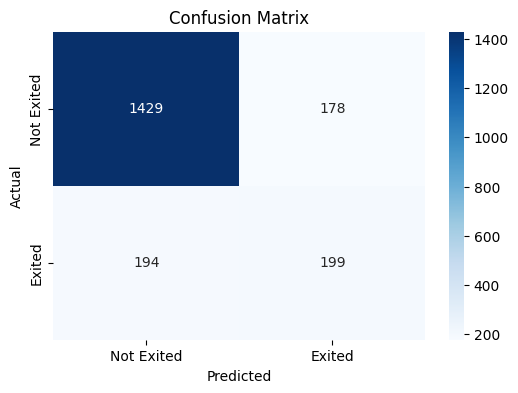

Classification Report (Precision, Recall, F1-Score):
              precision    recall  f1-score   support

           0       0.88      0.89      0.88      1607
           1       0.53      0.51      0.52       393

    accuracy                           0.81      2000
   macro avg       0.70      0.70      0.70      2000
weighted avg       0.81      0.81      0.81      2000



In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.neural_network import MLPClassifier  # Multi-layer Perceptron classifier

# 1. Read the dataset
file_path = r"C:\Users\Anil Rathod\Desktop\LP 3 chits\13\Churn_Modelling.csv"
df = pd.read_csv(file_path)

# Display basic information about the dataset
print(df.head())  # Check the first few rows
print(df.info())  # Check data types and non-null counts

# 2. Distinguish the feature and target sets and divide the dataset into training and test sets
X = df.drop(['Exited', 'CustomerId', 'Surname'], axis=1)  # Drop irrelevant columns
y = df['Exited']  # 'Exited' is the target variable

# Encode categorical variables (Geography and Gender)
X = pd.get_dummies(X, drop_first=True)  # One-hot encode categorical features

# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Normalize the train and test data using StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both train and test sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Initialize and build the model (Neural Network)
model = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=500, activation='relu', solver='adam', random_state=42)
model.fit(X_train_scaled, y_train)  # Train the model

# Identify the points of improvement and implement:
# - Tune the model by adjusting hyperparameters like hidden layers, learning rate, or adding dropout (if needed)
# - For now, this basic setup works, but further experiments can optimize performance.

# 5. Print the accuracy score and confusion matrix
y_pred = model.predict(X_test_scaled)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Visualizing the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Exited', 'Exited'], yticklabels=['Not Exited', 'Exited'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Additional Evaluation Metrics: Precision, Recall, F1-score
print("Classification Report (Precision, Recall, F1-Score):")
print(classification_report(y_test, y_pred))

